In [1]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

import matplotlib.pyplot as plt


<ipython-input-1-bb6aff92a59f>:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [2]:
df = pd.read_csv('sep22/ltccovidsummary.csv')
df['Report_Data_Extracted'] = pd.to_datetime(df['Report_Data_Extracted'])
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Report_Data_Extracted                152 non-null    datetime64[ns]
 1   LTC_Homes_with_Active_Outbreak       152 non-null    int64         
 2   LTC_Homes_with_Resolved_Outbreak     152 non-null    int64         
 3   Confirmed_Active_LTC_Resident_Cases  152 non-null    object        
 4   Confirmed_Active_LTC_HCW_Cases       152 non-null    float64       
 5   Total_LTC_Resident_Deaths            152 non-null    int64         
 6   Total_LTC_HCW_Deaths                 152 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 8.4+ KB


,Report_Data_Extracted,LTC_Homes_with_Active_Outbreak,LTC_Homes_with_Resolved_Outbreak,Confirmed_Active_LTC_Resident_Cases,Confirmed_Active_LTC_HCW_Cases,Total_LTC_Resident_Deaths,Total_LTC_HCW_Deaths
0,2020-04-24,145,31,2455.0,1120.0,625,<5
1,2020-04-25,147,31,2520.0,1161.0,654,<5
2,2020-04-26,150,32,2523.0,1187.0,671,<5
3,2020-04-27,154,34,2491.0,1205.0,705,<5
4,2020-04-28,159,34,2632.0,1361.0,775,<5


In [3]:
# df['Total_LTC_HCW_Deaths'].value_counts()
ls = ['Confirmed_Active_LTC_Resident_Cases','Total_LTC_HCW_Deaths']
for each in ls:
    df[each].replace({"<5": 1}, inplace=True)
    df[each] = pd.to_numeric(df[each])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Report_Data_Extracted                152 non-null    datetime64[ns]
 1   LTC_Homes_with_Active_Outbreak       152 non-null    int64         
 2   LTC_Homes_with_Resolved_Outbreak     152 non-null    int64         
 3   Confirmed_Active_LTC_Resident_Cases  152 non-null    float64       
 4   Confirmed_Active_LTC_HCW_Cases       152 non-null    float64       
 5   Total_LTC_Resident_Deaths            152 non-null    int64         
 6   Total_LTC_HCW_Deaths                 152 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 8.4 KB


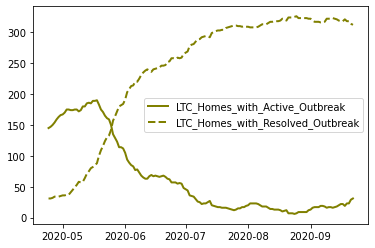

In [4]:
plt.plot( 'Report_Data_Extracted', 'LTC_Homes_with_Active_Outbreak', data=df, marker='', color='olive', linewidth=2)
plt.plot( 'Report_Data_Extracted', 'LTC_Homes_with_Resolved_Outbreak', data=df, marker='', color='olive', linewidth=2, linestyle='dashed')
plt.legend()


In [5]:
df.loc[df['LTC_Homes_with_Active_Outbreak'].idxmax()]

Report_Data_Extracted                  2020-05-18 00:00:00
LTC_Homes_with_Active_Outbreak         190                
LTC_Homes_with_Resolved_Outbreak       88                 
Confirmed_Active_LTC_Resident_Cases    2538               
Confirmed_Active_LTC_HCW_Cases         1615               
Total_LTC_Resident_Deaths              1408               
Total_LTC_HCW_Deaths                   5                  
Name: 24, dtype: object

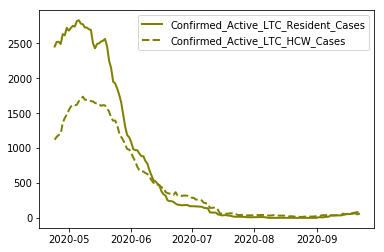

In [39]:
plt.plot( 'Report_Data_Extracted', 'Confirmed_Active_LTC_Resident_Cases', data=df, marker='', color='olive', linewidth=2)
plt.plot( 'Report_Data_Extracted', 'Confirmed_Active_LTC_HCW_Cases', data=df, marker='', color='olive', linewidth=2, linestyle='dashed')
# plt.plot( 'Report_Data_Extracted', 'LTC_Homes_with_Resolved_Outbreak', data=df, marker='', color='olive', linewidth=2)
plt.legend()

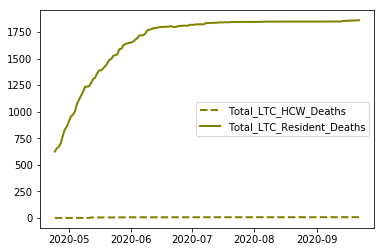

In [40]:
# plt.plot( 'Report_Data_Extracted', 'Total_LTC_Resident_Deaths', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")
plt.plot( 'Report_Data_Extracted', 'Total_LTC_HCW_Deaths', data=df, marker='', color='olive', linewidth=2, linestyle='dashed')
plt.plot( 'Report_Data_Extracted', 'Total_LTC_Resident_Deaths', data=df, marker='', color='olive', linewidth=2)
plt.legend()


In [43]:
df = pd.read_csv('sep22/activeltcoutbreak.csv')
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9786 entries, 0 to 9785
Data columns (total 7 columns):
Report_Data_Extracted        9786 non-null object
LTC_Home                     9786 non-null object
LTC_City                     0 non-null float64
Beds                         9785 non-null float64
Total_LTC_Resident_Cases     9786 non-null object
Total_LTC_Resident_Deaths    9786 non-null object
Total_LTC_HCW_Cases          9785 non-null object
dtypes: float64(2), object(5)
memory usage: 535.2+ KB


,Report_Data_Extracted,LTC_Home,LTC_City,Beds,Total_LTC_Resident_Cases,Total_LTC_Resident_Deaths,Total_LTC_HCW_Cases
0,2020-04-24,"Albright Gardens Homes, Incorporated",NaN,231.0,<5,0,<5
1,2020-04-24,Almonte Country Haven,NaN,82.0,44.0,25,17.0
2,2020-04-24,Altamont Care Community,NaN,159.0,125.0,32,45.0
3,2020-04-24,Anson Place Care Centre,NaN,61.0,28.0,23,33.0
4,2020-04-24,Bay Ridges,NaN,124.0,0.0,0,<5


In [45]:
df = pd.read_csv('sep22/resolvedltc.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36387 entries, 0 to 36386
Data columns (total 5 columns):
Report_Data_Extracted        36387 non-null object
LTC_Home                     36387 non-null object
City                         36387 non-null object
Beds                         36386 non-null object
Total_LTC_Resident_Deaths    36387 non-null object
dtypes: object(5)
memory usage: 1.4+ MB


,Report_Data_Extracted,LTC_Home,City,Beds,Total_LTC_Resident_Deaths
0,2020-04-24,Allendale,Milton,200.0,0
1,2020-04-24,Chartwell Westmount Long Term Care Residence,Kitchener,160.0,0
2,2020-04-24,Chelsey Park,London,247.0,0
3,2020-04-24,Chester Village,Toronto,203.0,0
4,2020-04-24,Clarion Nursing Home,Stoney Creek,100.0,0
